<a href="https://colab.research.google.com/github/yashmehta001/Heartratemonitor/blob/main/hrpf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import norm, shapiro
from sklearn.metrics import accuracy_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [ ]:
from google.colab import files

uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
!ls

heart_failure_clinical_records_dataset.csv  sample_data


In [ ]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")


In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


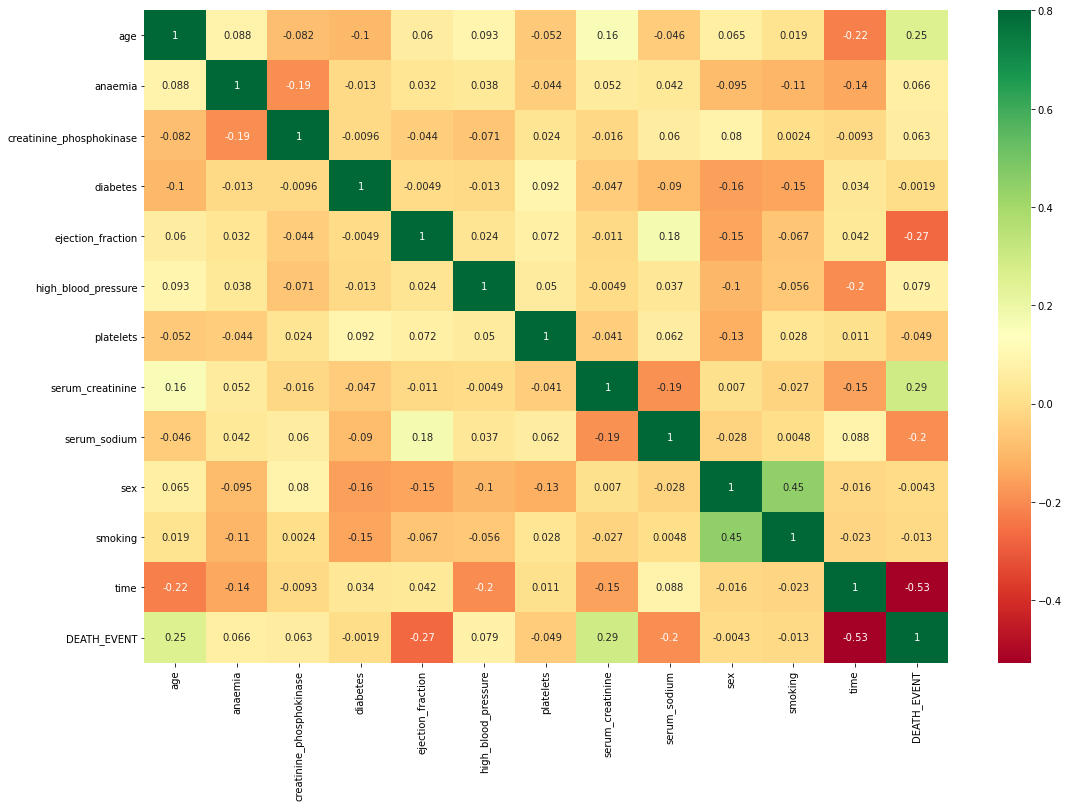

In [ ]:
color = plt.get_cmap('RdYlGn') 
color.set_bad('lightblue')

corrmat = data.corr()
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, cmap=color);

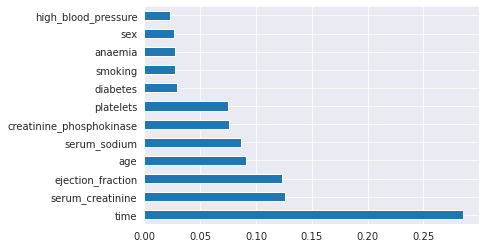

In [ ]:
sns.set_style("darkgrid")

x = data.iloc[:, :-1]
y = data.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(x,y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [ ]:
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

highly_correlated_features = ['age', 'anaemia', 'creatinine_phosphokinase','high_blood_pressure',
                             'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'time']

corr_highly_correlated_features = ['age', 'anaemia', 'creatinine_phosphokinase','high_blood_pressure',
                             'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'time', 'DEATH_EVENT']

corr_features = ['age', 'anaemia', 'creatinine_phosphokinase','high_blood_pressure',
                             'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'time', 'DEATH_EVENT']

training_features = ['serum_creatinine', 'ejection_fraction', 'time', 'age']


In [ ]:
skew_feats = data[features].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_feats})
skewness

,Skew
creatinine_phosphokinase,4.463110
serum_creatinine,4.455996
platelets,1.462321
smoking,0.770349
high_blood_pressure,0.626732
ejection_fraction,0.555383
age,0.423062
diabetes,0.333929
anaemia,0.278261
time,0.127803


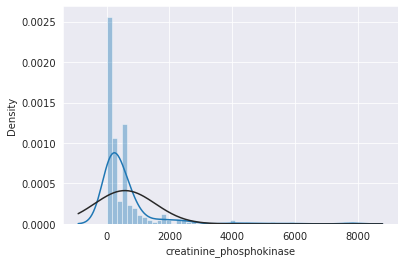

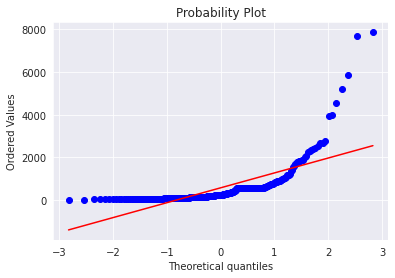

In [ ]:
sns.distplot(data['creatinine_phosphokinase'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['creatinine_phosphokinase'], plot=plt)

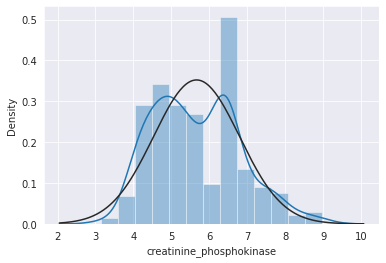

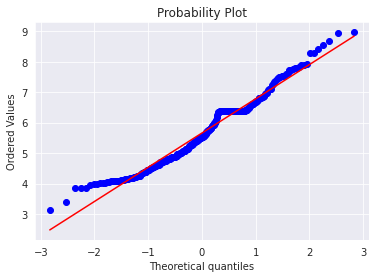

In [ ]:
data['creatinine_phosphokinase'] = np.log(data['creatinine_phosphokinase'])

#adjusted histogram and normal probability plot
sns.distplot(data['creatinine_phosphokinase'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['creatinine_phosphokinase'], plot=plt)

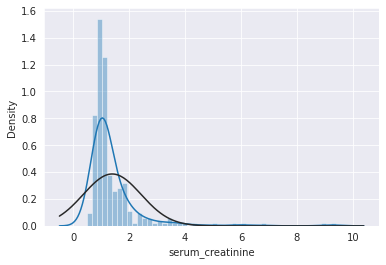

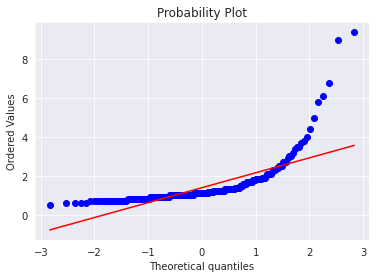

In [ ]:
sns.distplot(data['serum_creatinine'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['serum_creatinine'], plot=plt)

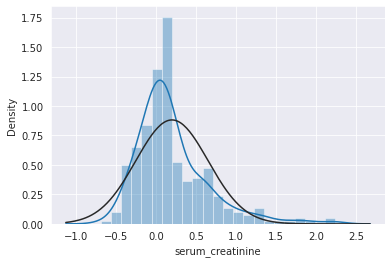

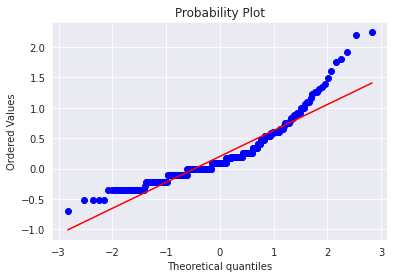

In [ ]:
#Remove skewness by logistic transformation
data['serum_creatinine'] = np.log(data['serum_creatinine'])

#adjusted histogram and normal probability plot
sns.distplot(data['serum_creatinine'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['serum_creatinine'], plot=plt)

In [ ]:
skew_feats = data[features].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew_feats})
skewness

,Skew
serum_creatinine,1.583990
platelets,1.462321
smoking,0.770349
high_blood_pressure,0.626732
ejection_fraction,0.555383
age,0.423062
creatinine_phosphokinase,0.414007
diabetes,0.333929
anaemia,0.278261
time,0.127803


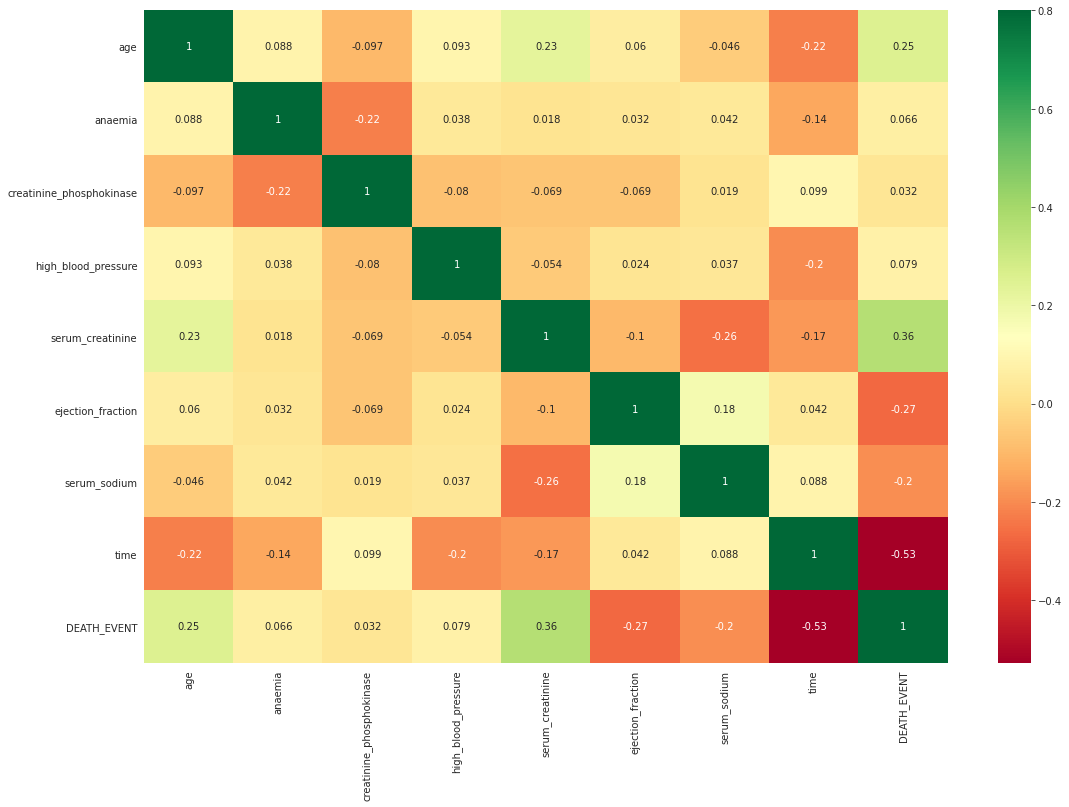

In [ ]:
color = plt.get_cmap('RdYlGn') 
color.set_bad('lightblue')

corrmat = data[corr_highly_correlated_features].corr()
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corrmat, vmax=.8, annot=True, cmap=color);

In [ ]:
#Splitting data into training and validation data.
data_train, data_test = train_test_split(data, test_size=0.2, random_state=2698)

In [ ]:
X_train = data_train[highly_correlated_features]
y_train = data_train.DEATH_EVENT
X_val = data_test[highly_correlated_features]
y_val = data_test.DEATH_EVENT

Optimal n_estimators hyperparameter value: 9
Optimal accuracy: 0.9666666666666667


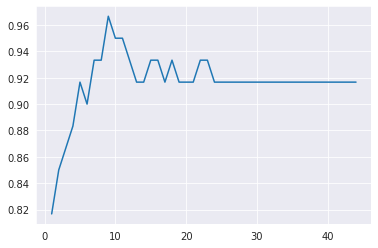

In [ ]:
#Finding the optimum number of n_estimators
estimatorList = []
best_estimators = 0
best_performer = 0

for estimators in range(1,45):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=1, criterion='gini', max_features='auto')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    estimatorList.append(accuracy_score(y_val,y_pred))
    
    if accuracy_score(y_val,y_pred) > best_performer:
        best_estimators = estimators
        best_performer = accuracy_score(y_val,y_pred)
        
print(f"Optimal n_estimators hyperparameter value: {best_estimators}")
print(f"Optimal accuracy: {best_performer}")

plt.plot(list(range(1,45)), estimatorList)
plt.show()

In [ ]:
#Construct RandomForestClassifier supplied with auto-generated n_estimators value.
Model = RandomForestClassifier(n_estimators = best_estimators, criterion='gini', random_state=1)

#Fit training data
Model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#Generate predications for validation data.
predictions = Model.predict(X_val)

#Calculate mean average error.
train_mae = mean_absolute_error(y_val, predictions)

In [ ]:
#Model accuracy summary

print(f"model train_mae: {train_mae}")
print(f"accuracy score: {accuracy_score(predictions, data_test.DEATH_EVENT)}")

model train_mae: 0.03333333333333333
accuracy score: 0.9666666666666667


Text(69.0, 0.5, 'Actual')

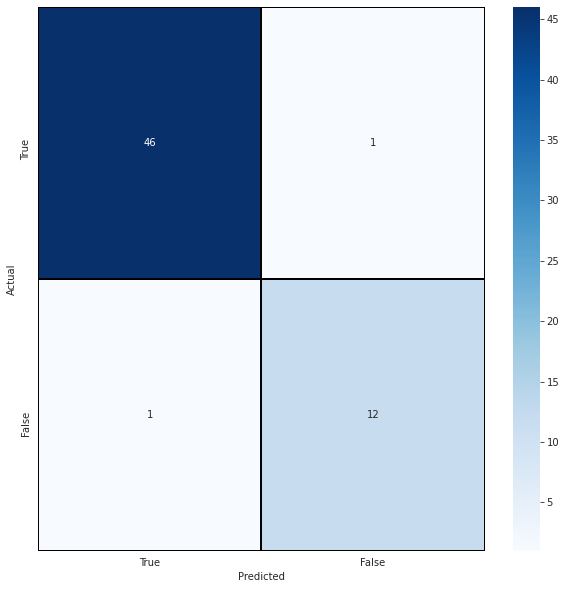

In [ ]:
plt.figure(figsize = (10,10))
cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm,cmap= "Blues", linecolor = 'black', linewidth = 1, annot = True, fmt='', 
            xticklabels = ['True','False'], yticklabels = ['True','False'])
plt.xlabel("Predicted")
plt.ylabel("Actual")